## Homework 2
##### Task: Improve Linear Interpolation/Extrapolation function
##### Data Used: NYC Weather data from NOAA (National Oceanic and Atmospheric Administration)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
sns.set()

%matplotlib inline

In [2]:
# Function for linear extrapolation (to get right points)

def getRightPoints(nan_pos, df, column):
    points = []
    slope = 0
    
    for x_coord, value in enumerate(df[column]):
        if pd.isnull(value) == False and len(points) < 2:
            points.append(x_coord)
        
            if len(points) == 2:
                x1 = points[0]
                x2 = points[1]
                y1 = df.loc[x1, column]
                y2 = df.loc[x2, column]
                
                slope = (y2 - y1) / (x2 - x1)
                break
            
    if len(points) != 2:
        raise Exception("No points for prediction!!")
    y3 = y1 + (slope * (nan_pos - x1))
    return y3
                

In [3]:
# Function of linear extrapolation (to get left points)

def getLeftPoints(nan_pos, df, column):
    points = []
    slope = 0
    
    for x_coord, value in enumerate(df[column].values[::-1]):
        if pd.isnull(value) == False and len(points) < 2:
            reverse_counter = len(df) - 1 - x_coord
            points.append(reverse_counter)
        
            if len(points) == 2:
                x1 = points[0]
                x2 = points[1]
                y1 = df.loc[x1, column]
                y2 = df.loc[x2, column]
                
                slope = (y2 - y1) / (x2 - x1)
                break
            
    if len(points) != 2:
        raise Exception("No points for prediction!!")
    y3 = y1 + (slope * (nan_pos - x1))
    return y3

In [4]:
def interpolate(df, column):
    x1, x2, y1, y2 = np.nan, np.nan, np.nan, np.nan
    left_pos, right_pos = 0, 0
    
    for i, value in enumerate(df[column]):
        if pd.isnull(value):
             # get one left
            left_pos = i - 1
            while left_pos >= 0 and y1 is np.nan:
                y1 = df.loc[left_pos, column]
                if y1 == np.nan:
                    left_pos-=1
            
            #get one right
            right_pos = i + 1
            while right_pos <= len(df) - 1 and y2 is np.nan:
                y2 = df.loc[right_pos, column]
                if y2 == np.nan:
                    right_pos+=1
                    
            # find y3
            if left_pos < 0 or pd.isnull(y1):
                # get both rights
                y3 = getRightPoints(i, df, column)

            elif right_pos >= len(df) or pd.isnull(y2):
                # get both lefts
                y3 = getLeftPoints(i, df, column)
                
            else:
                x1 = left_pos
                x2 = right_pos

                # Calculate slope and apply two point formula
                slope = (y2 - y1) / (x2 - x1)

                y3 = y1 + (slope * (i - x1))
            
            # Input y3 into table
            df.loc[i, column] = y3

In [5]:
weather_df = pd.read_csv("nyc_weather.csv")

In [6]:
# Exploring data
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   STATION  366 non-null    object
 1   NAME     366 non-null    object
 2   DATE     366 non-null    object
 3   TAVG     366 non-null    int64 
 4   TMAX     366 non-null    int64 
 5   TMIN     366 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 17.3+ KB


In [7]:
# Turn DATE column into "datetime" object
weather_df.DATE = pd.to_datetime(weather_df.DATE)
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  366 non-null    object        
 1   NAME     366 non-null    object        
 2   DATE     366 non-null    datetime64[ns]
 3   TAVG     366 non-null    int64         
 4   TMAX     366 non-null    int64         
 5   TMIN     366 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 17.3+ KB


In [8]:
weather_df.head()

,STATION,NAME,DATE,TAVG,TMAX,TMIN
0,USW00014732,"LAGUARDIA AIRPORT, NY US",2020-01-01,40,42,35
1,USW00014732,"LAGUARDIA AIRPORT, NY US",2020-01-02,40,49,34
2,USW00014732,"LAGUARDIA AIRPORT, NY US",2020-01-03,47,49,45
3,USW00014732,"LAGUARDIA AIRPORT, NY US",2020-01-04,47,50,41
4,USW00014732,"LAGUARDIA AIRPORT, NY US",2020-01-05,40,41,36


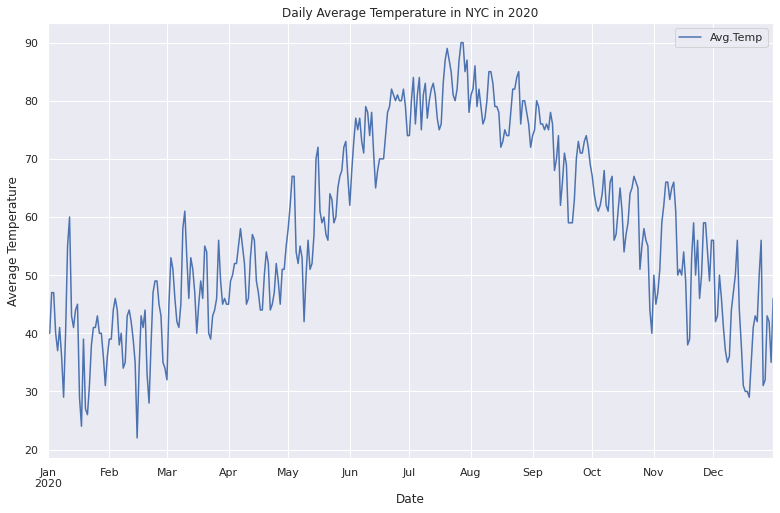

In [9]:
# Graphing ONLY TAVG (Average Temperature) column
weather_df.plot(
    x = "DATE", 
    y = "TAVG", 
    figsize=(13,8), 
    xlabel = "Date", 
    ylabel = "Average Temperature",
    label = "Avg.Temp",
    title = "Daily Average Temperature in NYC in 2020"
)
plt.show()

<AxesSubplot:title={'center':'Daily Average Temperature in NYC (Week 1 of 2020)'}, xlabel='Date', ylabel='Average Temperature'>

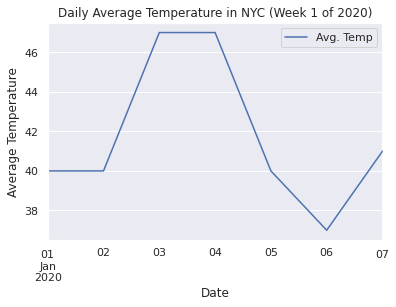

In [10]:
# For testing and visualization purposes, I will focus on manipulating the first week of January
c1 = weather_df.DATE <= datetime(2020, 1, 7)
weather_df[c1].plot(
    x = "DATE", 
    y = "TAVG", 
    xlabel = "Date", 
    ylabel = "Average Temperature", 
    label = "Avg. Temp", 
    title = "Daily Average Temperature in NYC (Week 1 of 2020)"
)

In [11]:
# Creating a copy for the original values and predicted values
original_df = weather_df[c1].copy()
predicted_df = weather_df[c1].copy()

In [12]:
# Creating null values for end (extrapolation) and middle (interpolation) values
predicted_df.loc[3, "TAVG"] = np.nan
predicted_df.loc[0, "TAVG"] = np.nan
predicted_df.loc[6, "TAVG"] = np.nan
predicted_df, original_df

(       STATION                      NAME       DATE  TAVG  TMAX  TMIN
 0  USW00014732  LAGUARDIA AIRPORT, NY US 2020-01-01   NaN    42    35
 1  USW00014732  LAGUARDIA AIRPORT, NY US 2020-01-02  40.0    49    34
 2  USW00014732  LAGUARDIA AIRPORT, NY US 2020-01-03  47.0    49    45
 3  USW00014732  LAGUARDIA AIRPORT, NY US 2020-01-04   NaN    50    41
 4  USW00014732  LAGUARDIA AIRPORT, NY US 2020-01-05  40.0    41    36
 5  USW00014732  LAGUARDIA AIRPORT, NY US 2020-01-06  37.0    44    32
 6  USW00014732  LAGUARDIA AIRPORT, NY US 2020-01-07   NaN    44    35,
        STATION                      NAME       DATE  TAVG  TMAX  TMIN
 0  USW00014732  LAGUARDIA AIRPORT, NY US 2020-01-01    40    42    35
 1  USW00014732  LAGUARDIA AIRPORT, NY US 2020-01-02    40    49    34
 2  USW00014732  LAGUARDIA AIRPORT, NY US 2020-01-03    47    49    45
 3  USW00014732  LAGUARDIA AIRPORT, NY US 2020-01-04    47    50    41
 4  USW00014732  LAGUARDIA AIRPORT, NY US 2020-01-05    40    41    36
 5  U

In [13]:
# Testing linear interpolation function
interpolate(predicted_df, "TAVG")
predicted_df

,STATION,NAME,DATE,TAVG,TMAX,TMIN
0,USW00014732,"LAGUARDIA AIRPORT, NY US",2020-01-01,33.0,42,35
1,USW00014732,"LAGUARDIA AIRPORT, NY US",2020-01-02,40.0,49,34
2,USW00014732,"LAGUARDIA AIRPORT, NY US",2020-01-03,47.0,49,45
3,USW00014732,"LAGUARDIA AIRPORT, NY US",2020-01-04,43.5,50,41
4,USW00014732,"LAGUARDIA AIRPORT, NY US",2020-01-05,40.0,41,36
5,USW00014732,"LAGUARDIA AIRPORT, NY US",2020-01-06,37.0,44,32
6,USW00014732,"LAGUARDIA AIRPORT, NY US",2020-01-07,34.0,44,35


<AxesSubplot:title={'center':'Daily Average Temperature in NYC (Week 1 of 2020)'}, xlabel='Date', ylabel='Average Temperature'>

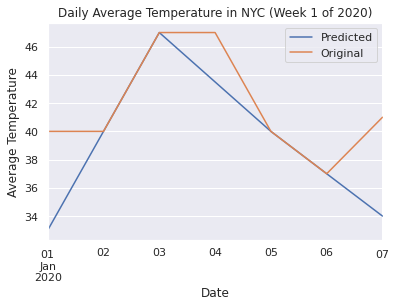

In [14]:
# Graphing both plots (Works as intended)
ax = predicted_df.plot(x = "DATE", 
                       y = "TAVG", 
                       label = "Predicted"
                      )
original_df.plot(x = "DATE", 
                 y = "TAVG", 
                 label = "Original", 
                 xlabel = "Date", 
                 ylabel = "Average Temperature", 
                 title = "Daily Average Temperature in NYC (Week 1 of 2020)", 
                 ax=ax
                )

In [15]:
# Making another test
predicted_df = original_df.copy()
predicted_df.loc[4, "TAVG"] = np.nan
predicted_df.loc[5, "TAVG"] = np.nan
predicted_df.loc[6, "TAVG"] = np.nan
predicted_df

,STATION,NAME,DATE,TAVG,TMAX,TMIN
0,USW00014732,"LAGUARDIA AIRPORT, NY US",2020-01-01,40.0,42,35
1,USW00014732,"LAGUARDIA AIRPORT, NY US",2020-01-02,40.0,49,34
2,USW00014732,"LAGUARDIA AIRPORT, NY US",2020-01-03,47.0,49,45
3,USW00014732,"LAGUARDIA AIRPORT, NY US",2020-01-04,47.0,50,41
4,USW00014732,"LAGUARDIA AIRPORT, NY US",2020-01-05,NaN,41,36
5,USW00014732,"LAGUARDIA AIRPORT, NY US",2020-01-06,NaN,44,32
6,USW00014732,"LAGUARDIA AIRPORT, NY US",2020-01-07,NaN,44,35


In [16]:
interpolate(predicted_df, "TAVG")
predicted_df

,STATION,NAME,DATE,TAVG,TMAX,TMIN
0,USW00014732,"LAGUARDIA AIRPORT, NY US",2020-01-01,40.0,42,35
1,USW00014732,"LAGUARDIA AIRPORT, NY US",2020-01-02,40.0,49,34
2,USW00014732,"LAGUARDIA AIRPORT, NY US",2020-01-03,47.0,49,45
3,USW00014732,"LAGUARDIA AIRPORT, NY US",2020-01-04,47.0,50,41
4,USW00014732,"LAGUARDIA AIRPORT, NY US",2020-01-05,47.0,41,36
5,USW00014732,"LAGUARDIA AIRPORT, NY US",2020-01-06,47.0,44,32
6,USW00014732,"LAGUARDIA AIRPORT, NY US",2020-01-07,47.0,44,35


<AxesSubplot:title={'center':'Daily Average Temperature in NYC (Week 1 of 2020)'}, xlabel='Date', ylabel='Average Temperature'>

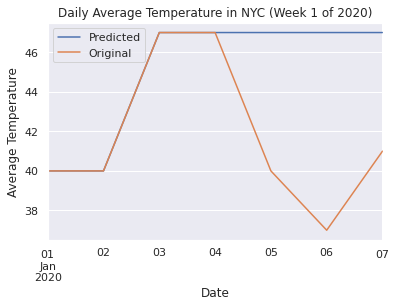

In [17]:
# Graphing both graphs
ax = predicted_df.plot(x = "DATE", 
                       y = "TAVG", 
                       label = "Predicted"
                      )
original_df.plot(x = "DATE", 
                 y = "TAVG", 
                 label = "Original", 
                 xlabel = "Date", 
                 ylabel = "Average Temperature", 
                 title = "Daily Average Temperature in NYC (Week 1 of 2020)", 
                 ax=ax
                )